### Import des bibliothèques

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree


### Chargement des données 

In [29]:
immatriculations = pd.read_csv("../data/clustered/immatriculations_clusters.csv")
clients = pd.read_csv("../data/processed/clients_processed.csv")

### Prétraitement des données

In [30]:
# Fusionner les clusters du catalogue avec les immatriculations sur les colonnes 'marque' et 'nom'
clients_immatriculations = clients.merge(
    immatriculations, 
    on=['immatriculation'],  # Jointure sur les colonnes 'marque' et 'nom'
    how='left'  # Utilisation d'une jointure 'left' pour conserver toutes les lignes de immatriculations
)

In [31]:
len(clients_immatriculations)

99783

In [32]:
clients_immatriculations.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Cluster
0,25.0,F,901.645491,En Couple,2.0,False,3467 SB 72,Seat,Toledo 1.6,102.0,longue,5.0,5.0,bleu,False,18880.0,0.0
1,53.0,M,594.000000,En Couple,2.0,False,113 LY 42,Renault,Vel Satis 3.5 V6,245.0,très longue,5.0,5.0,noir,False,49200.0,3.0
2,20.0,F,949.000000,En Couple,1.0,False,925 WK 87,Jaguar,X-Type 2.5 V6,197.0,longue,5.0,5.0,blanc,False,37100.0,3.0
3,29.0,M,571.000000,En Couple,2.0,False,3279 RV 81,Renault,Laguna 2.0T,170.0,longue,5.0,5.0,gris,False,27300.0,0.0
4,47.0,M,901.645491,En Couple,1.0,False,82 RZ 54,Fiat,Croma 2.2,147.0,longue,5.0,5.0,bleu,False,24780.0,0.0


In [55]:
clients_immatriculations['situationFamiliale'].unique()

array(['En Couple', 'Célibataire', 'Marié(e)', 'Divorcée'], dtype=object)

In [56]:
clients_immatriculations['2eme voiture'].unique()

array([False,  True])

In [33]:
clients_immatriculations_0 = clients_immatriculations[clients_immatriculations['Cluster'] == 0]
clients_immatriculations_0.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Cluster
0,25.0,F,901.645491,En Couple,2.0,False,3467 SB 72,Seat,Toledo 1.6,102.0,longue,5.0,5.0,bleu,False,18880.0,0.0
3,29.0,M,571.000000,En Couple,2.0,False,3279 RV 81,Renault,Laguna 2.0T,170.0,longue,5.0,5.0,gris,False,27300.0,0.0
4,47.0,M,901.645491,En Couple,1.0,False,82 RZ 54,Fiat,Croma 2.2,147.0,longue,5.0,5.0,bleu,False,24780.0,0.0
7,58.0,M,901.645491,Célibataire,0.0,False,3696 JS 92,Renault,Megane 2.0 16V,135.0,moyenne,5.0,5.0,noir,False,22350.0,0.0
30,47.0,M,901.645491,En Couple,1.0,False,5960 XV 21,Renault,Laguna 2.0T,170.0,longue,5.0,5.0,gris,False,27300.0,0.0


In [34]:
#Prendre clients_immatriculations pour les voitures neuves 
clients_immatriculations = clients_immatriculations[clients_immatriculations["occasion"] == False]

In [35]:
len(clients_immatriculations)

68503

In [59]:
# Copie des données pour éviter de modifier l'original
data = clients_immatriculations.copy()

# Encodage des colonnes catégoriques
categorical_cols = ["sexe", "situationFamiliale", "2eme voiture"]
encoder = LabelEncoder()

for col in categorical_cols:
    # Encoder la colonne
    data[col] = encoder.fit_transform(data[col])

# Vérification des données encodées
print(data.head())


    age  sexe        taux  situationFamiliale  nbEnfantsAcharge  2eme voiture  \
0  25.0     0  901.645491                   2               2.0             0   
1  53.0     1  594.000000                   2               2.0             0   
2  20.0     0  949.000000                   2               1.0             0   
3  29.0     1  571.000000                   2               2.0             0   
4  47.0     1  901.645491                   2               1.0             0   

  immatriculation   marque               nom  puissance     longueur  \
0      3467 SB 72     Seat        Toledo 1.6      102.0       longue   
1       113 LY 42  Renault  Vel Satis 3.5 V6      245.0  très longue   
2       925 WK 87   Jaguar     X-Type 2.5 V6      197.0       longue   
3      3279 RV 81  Renault       Laguna 2.0T      170.0       longue   
4        82 RZ 54     Fiat         Croma 2.2      147.0       longue   

   nbPlaces  nbPortes couleur occasion     prix  Cluster  
0       5.0       5.0

In [37]:
# Calcul de la corrélation entre les facteurs et Cluster
correlation_matrix = data[["age", "sexe", "taux", "situationFamiliale", 
                           "nbEnfantsAcharge", "2eme voiture", "Cluster"]].corr()

# Extraction des corrélations avec Cluster
cluster_correlation = correlation_matrix["Cluster"].sort_values(ascending=False)
print("Corrélations avec Cluster :")
print(cluster_correlation)

Corrélations avec Cluster :
Cluster               1.000000
nbEnfantsAcharge      0.482318
situationFamiliale    0.387195
taux                  0.106786
2eme voiture          0.004631
sexe                 -0.003441
age                  -0.100955
Name: Cluster, dtype: float64


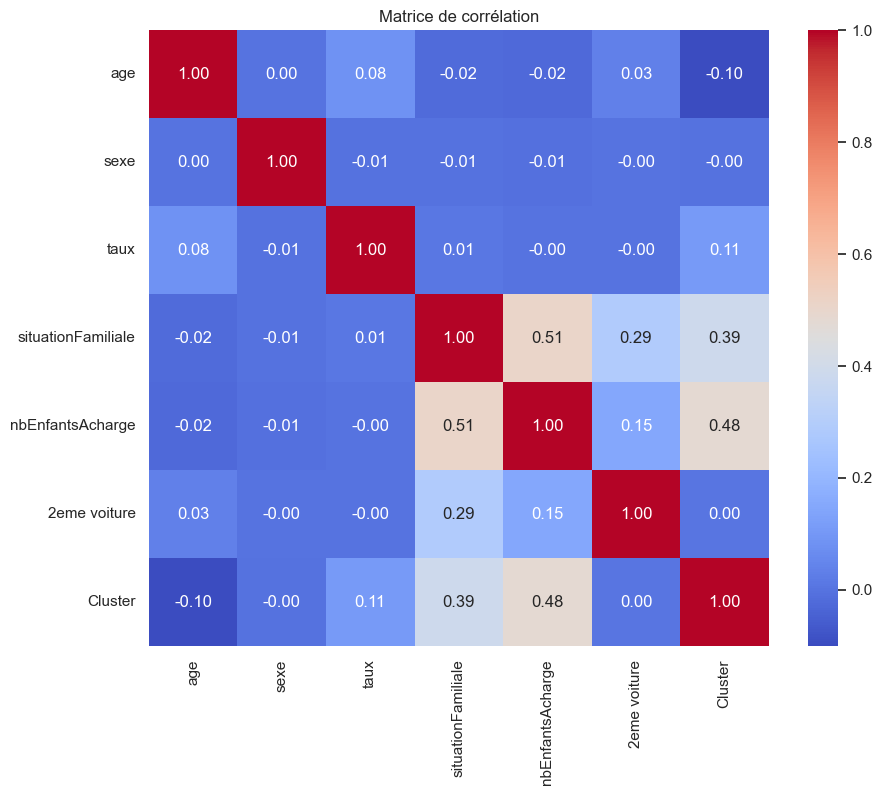

In [38]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [39]:
X = data[["age","taux","situationFamiliale","nbEnfantsAcharge","2eme voiture"]]
Y = clients_immatriculations[["Cluster"]]

In [40]:
X.shape

(68503, 5)

In [41]:
Y.shape

(68503, 1)

### Classification

#### Arbres de décision

In [42]:
# Encodage des variables catégoriques
# encoder = OrdinalEncoder()
# X_encoded = X.copy()
# X_encoded[["situationFamiliale", "2eme voiture"]] = encoder.fit_transform(X[["situationFamiliale", "2eme voiture"]])

In [43]:
X.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,25.0,901.645491,2,2.0,0
1,53.0,594.000000,2,2.0,0
2,20.0,949.000000,2,1.0,0
3,29.0,571.000000,2,2.0,0
4,47.0,901.645491,2,1.0,0


In [44]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
# Création et entraînement du modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=5)  # Utilise l'entropie comme RapidMiner
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [46]:
# Prédiction sur l'ensemble de test
Y_pred = decision_tree.predict(X_test)

In [47]:
# Évaluation du modèle
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.54      0.59      3441
         1.0       0.80      0.99      0.89      4426
         2.0       0.98      0.58      0.73      1997
         3.0       0.72      0.77      0.74      3837

    accuracy                           0.76     13701
   macro avg       0.78      0.72      0.74     13701
weighted avg       0.76      0.76      0.75     13701

Confusion Matrix:
 [[1855 1100    5  481]
 [  15 4398    1   12]
 [ 162    4 1161  670]
 [ 866    0   17 2954]]
Accuracy: 0.7567330851762645


#### Random forests

In [64]:
# Modèle Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [65]:
# Évaluation du modèle
Y_pred = random_forest.predict(X_test)
print("Rapport de classification:\n", classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      3441
         1.0       0.82      0.93      0.87      4426
         2.0       0.76      0.70      0.73      1997
         3.0       0.80      0.66      0.72      3837

    accuracy                           0.76     13701
   macro avg       0.75      0.74      0.74     13701
weighted avg       0.76      0.76      0.75     13701

Accuracy: 0.7557112619516824


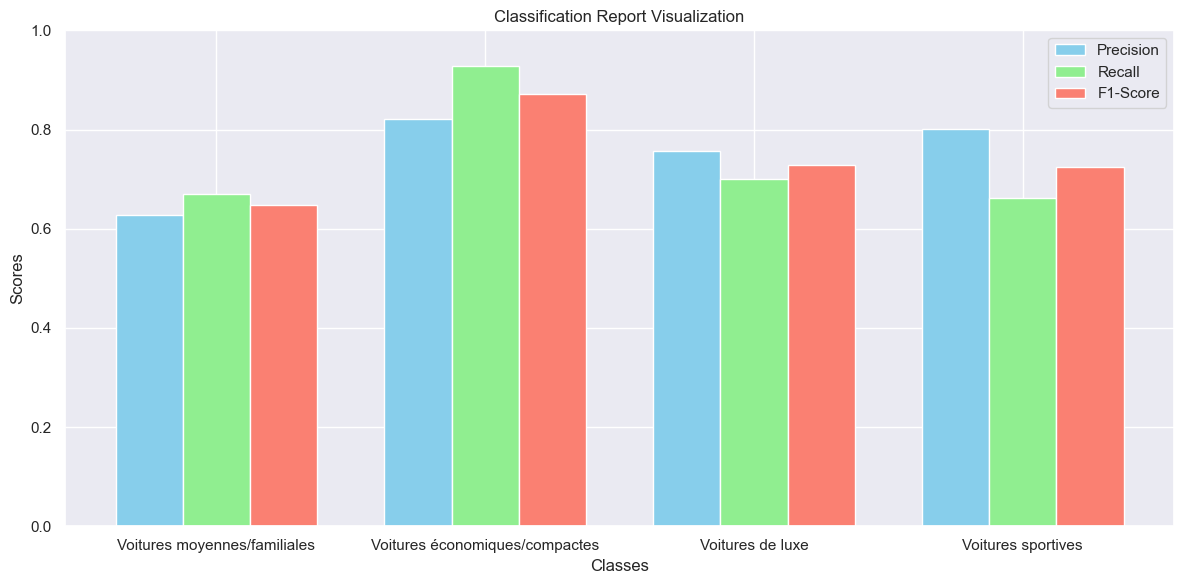

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Cluster names mapping
cluster_names = {
    0: "Voitures moyennes/familiales",
    1: "Voitures économiques/compactes",
    2: "Voitures de luxe",
    3: "Voitures sportives"
}

# Generate predictions
Y_pred = random_forest.predict(X_test)

# Map numeric classes to descriptive names
class_names = [cluster_names[i] for i in sorted(cluster_names.keys())]

# Get classification report as a dictionary
report = classification_report(Y_test, Y_pred, output_dict=True, target_names=class_names)

# Extract metrics for each class
precision = [report[label]["precision"] for label in class_names]
recall = [report[label]["recall"] for label in class_names]
f1_score = [report[label]["f1-score"] for label in class_names]

# Define bar width and positions
x = np.arange(len(class_names))  # Positions for groups
width = 0.25

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label="Precision", color="skyblue")
plt.bar(x, recall, width, label="Recall", color="lightgreen")
plt.bar(x + width, f1_score, width, label="F1-Score", color="salmon")

# Add labels and title
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Classification Report Visualization")
plt.xticks(x, class_names, rotation=360, ha="center")
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

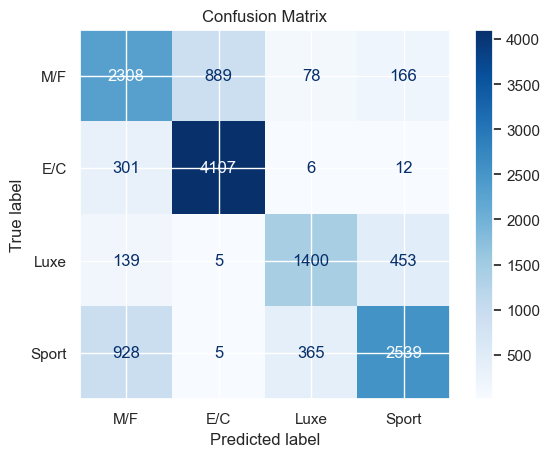

In [86]:
cluster_names = {
    0: "M/F",
    1: "E/C",
    2: "Luxe",
    3: "Sport"
}
# Map numeric classes to descriptive names
class_names = [cluster_names[i] for i in sorted(cluster_names.keys())]
# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=360)
plt.title("Confusion Matrix")
plt.show()

#### Support vector machines

In [50]:
# Modèle SVM
#RBF
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)

c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [51]:
# Évaluation du modèle
Y_pred = svm_model.predict(X_test)
print("Rapport de classification:\n", classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.35      0.19      0.25      3441
         1.0       0.38      0.62      0.47      4426
         2.0       0.00      0.00      0.00      1997
         3.0       0.36      0.42      0.39      3837

    accuracy                           0.37     13701
   macro avg       0.27      0.31      0.28     13701
weighted avg       0.31      0.37      0.32     13701

Accuracy: 0.3674914239836508


c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in label

In [52]:
import joblib

# Chemin où le modèle sera sauvegardé
model_path = "../models/svm_model.pkl"

# Sauvegarde du modèle
joblib.dump(svm_model, model_path)
print(f"Modèle SVM sauvegardé dans : {model_path}")

Modèle SVM sauvegardé dans : ../models/svm_model.pkl


In [53]:
# Chemin où le modèle sera sauvegardé
model_path = "../models/decision_tree_model.pkl"

# Sauvegarde du modèle
joblib.dump(decision_tree, model_path)
print(f"Modèle decision_tree sauvegardé dans : {model_path}")

Modèle decision_tree sauvegardé dans : ../models/decision_tree_model.pkl


In [54]:
# Chemin où le modèle sera sauvegardé
model_path = "../models/random_forest_model.pkl"

# Sauvegarde du modèle
joblib.dump(random_forest, model_path)
print(f"Modèle random_forest sauvegardé dans : {model_path}")

Modèle random_forest sauvegardé dans : ../models/random_forest_model.pkl
